Data Science Problem Statement: Employee Attrition Prediction

Your task is to predict employee attrition using a given dataset. The dataset includes various features related to employees, and the column names are self explanatory.:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READ THE DATA SET

In [2]:
emp=pd.read_csv("/content/Employee.csv")

EXPLORATORY DATA ANALYSIS

In [3]:
emp.shape # shows the size of the data set having 74498 rows and 24 columns

(74498, 24)

In [4]:
emp.size # shows the total number of elements in data set

1787952

In [5]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

Data set consist 3 types of data set character ,integer and float type

In [6]:
emp.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


it shows the statistical information about data and having hign variance in standard deviation values

NULL VALUE FOUND

In [7]:
emp.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

It shows there exit the missing values in various columns likue remote work,performance rating etc

MISSING VALUE IMPUTATION

In [9]:
for i in ['Work-Life Balance','Performance Rating','Education Level','Marital Status','Job Level','Company Size','Remote Work','Employee Recognition','Attrition']:
    emp[i]=emp[i].fillna(emp[i].mode()[0])

In [11]:
for i in ['Number of Promotions','Number of Dependents',]:
    emp[i]=emp[i].fillna(emp[i].median())

In [12]:
emp.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

missing values are removed using fillna method and for chatagorical values used mode function and for integer and float i used mean function

OUTLIER DETECTION

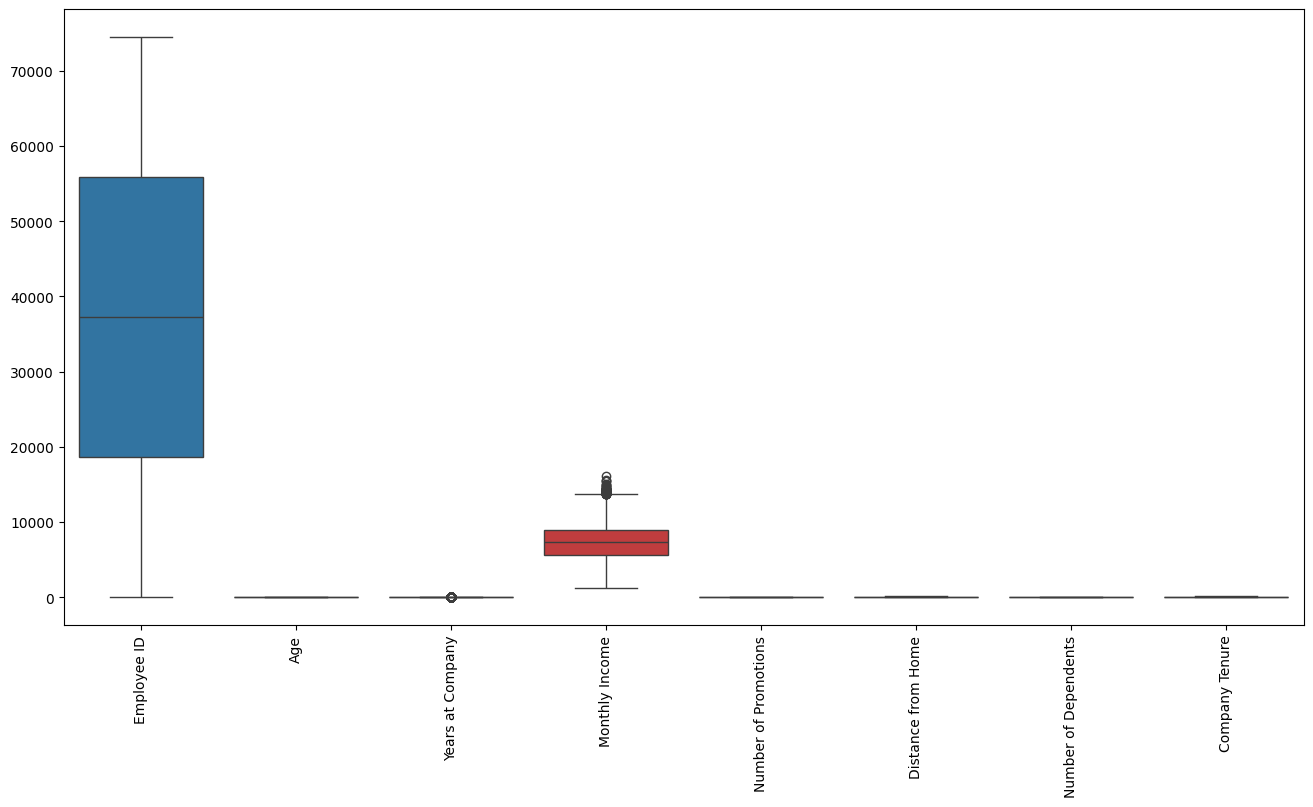

In [13]:
plt.figure(figsize=(16,8))
sns.boxplot(emp)
plt.xticks(rotation=90)
plt.show()

<ipython-input-18-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


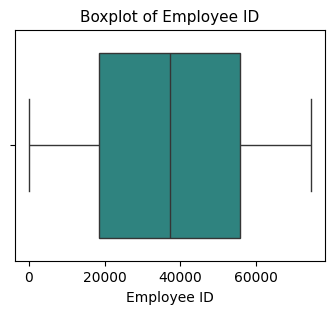

<ipython-input-18-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


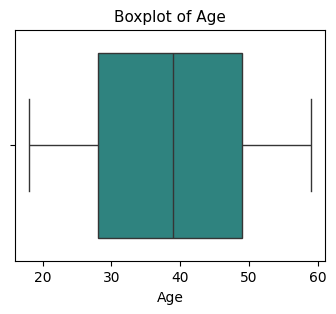

<ipython-input-18-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


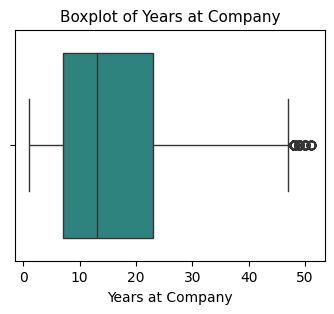

<ipython-input-18-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


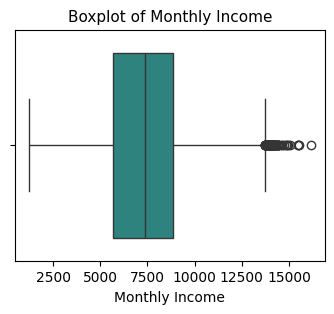

<ipython-input-18-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


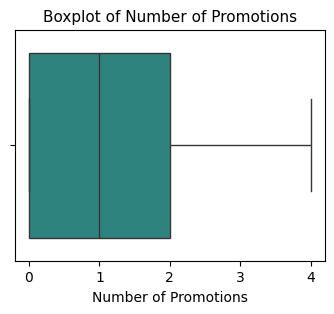

<ipython-input-18-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


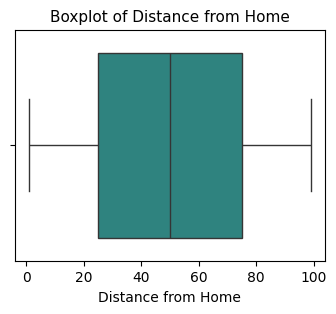

<ipython-input-18-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


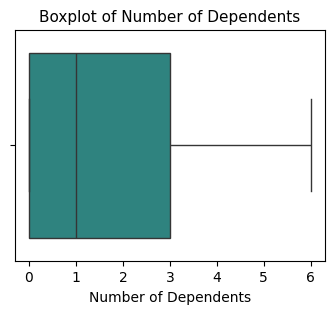

<ipython-input-18-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


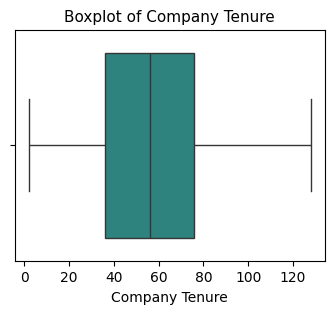

In [18]:
for column in emp.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=emp[column], palette='viridis')
    plt.title(f'Boxplot of {column}', fontsize=11)
    plt.xlabel(column, fontsize=10)
    plt.show()

In [20]:
for i in emp.select_dtypes(include=['int64', 'float64']).columns:
    Q1=np.percentile(emp[i],25,method='midpoint')
    Q3=np.percentile(emp[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in emp[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    emp[i]=emp[i].clip(lower=low_lim,upper=up_lim)

<ipython-input-21-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


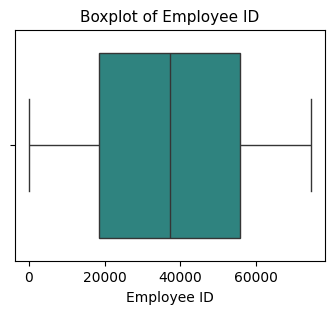

<ipython-input-21-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


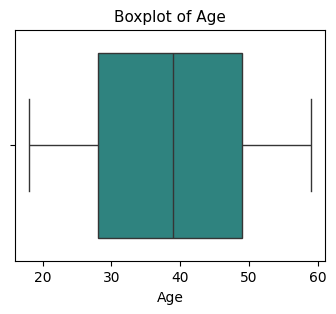

<ipython-input-21-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


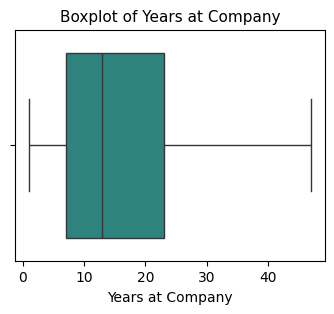

<ipython-input-21-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


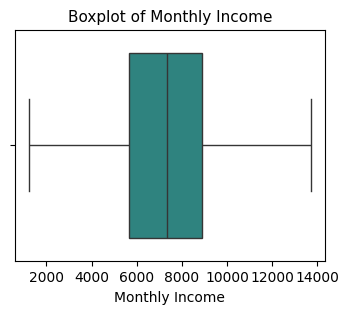

<ipython-input-21-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


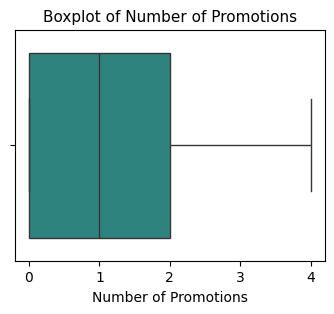

<ipython-input-21-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


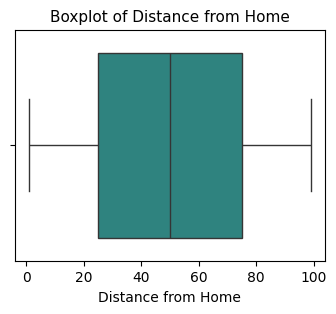

<ipython-input-21-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


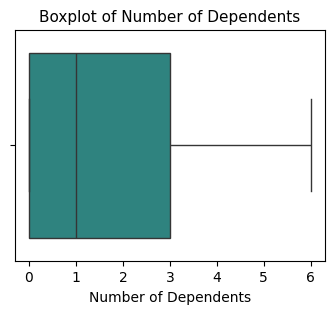

<ipython-input-21-2a539bd8a9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=emp[column], palette='viridis')


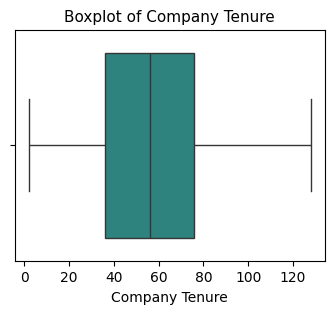

In [21]:
for column in emp.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=emp[column], palette='viridis')
    plt.title(f'Boxplot of {column}', fontsize=11)
    plt.xlabel(column, fontsize=10)
    plt.show()

outliers are removed by IQR method

CORRELATION

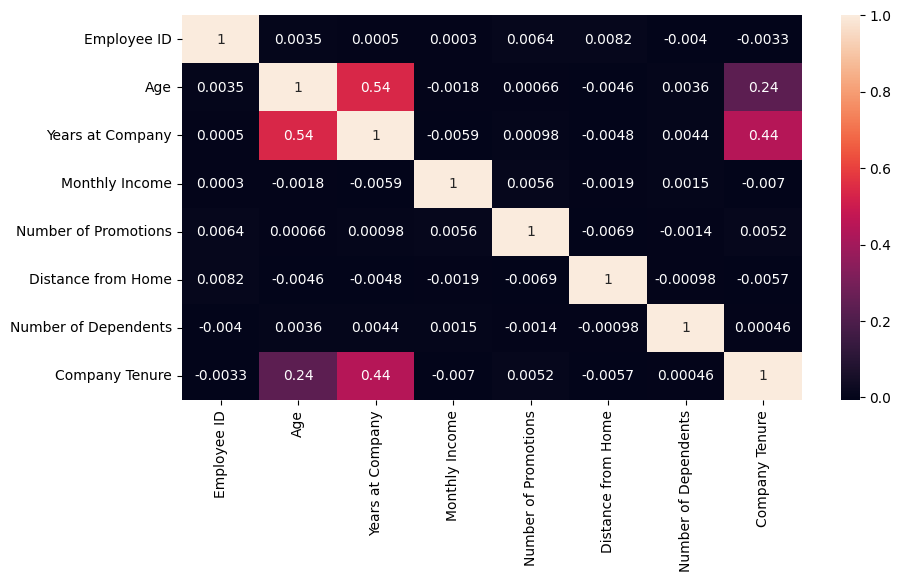

In [22]:
data=emp.select_dtypes(['int64','float64']).corr()
plt.subplots(figsize=(10,5))
sns.heatmap(data,annot=True)
plt.show()

NO CORRELATION EXIST

Encoding using Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in emp.select_dtypes(include=['object']).columns:
    emp[column]=le.fit_transform(emp[column])
    emp[i]=le.fit_transform(emp[i])

TRAIN TEST

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = emp.drop(['Attrition', 'Employee ID'], axis=1)
y = emp['Attrition']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [32]:
dtc_emp=DecisionTreeClassifier()
dtc_emp.fit(X_train_sc,y_train)
dtc_pred=dtc_emp.predict(X_train_sc)
print('Accuracy of Decision Tree Classifier', accuracy_score(y_train,dtc_pred))
print('Precision of Decision Tree Classifier', precision_score(y_train,dtc_pred))
print('Recall of Decision Tree Classifier:',recall_score(y_train,dtc_pred))
print('F1 score of Decision Tree Classifier', f1_score(y_train,dtc_pred))

Accuracy of Decision Tree Classifier 1.0
Precision of Decision Tree Classifier 1.0
Recall of Decision Tree Classifier: 1.0
F1 score of Decision Tree Classifier 1.0


RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_emp=RandomForestClassifier()
rf_emp.fit(X_train_sc,y_train)
rf_pred=rf_emp.predict(X_train_sc)
print('Accuracy of Random Forest Classifier', accuracy_score(y_train,rf_pred))
print('Precision of Random Forest Classifier', precision_score(y_train,rf_pred))
print('Recall of Random Forest Classifier:',recall_score(y_train,rf_pred))
print('F1 score of Random Forest Classifier', f1_score(y_train,rf_pred))

Accuracy of Random Forest Classifier 1.0
Precision of Random Forest Classifier 1.0
Recall of Random Forest Classifier: 1.0
F1 score of Random Forest Classifier 1.0


KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn_emp=KNeighborsClassifier()
knn_emp.fit(X_train_sc,y_train)
knn_pred=knn_emp.predict(X_train_sc)
print('Accuracy of KNN Classifier', accuracy_score(y_train,knn_pred))
print('Precision of KNN Classifier', precision_score(y_train,knn_pred))
print('Recall of KNN Classifier:',recall_score(y_train,knn_pred))
print('F1 score of KNN Classifier', f1_score(y_train,knn_pred))

Accuracy of KNN Classifier 0.7834826672035974
Precision of KNN Classifier 0.7914741439331603
Recall of KNN Classifier: 0.7983973949687141
F1 score of KNN Classifier 0.7949206954642256


HYPER TUNING

DECISION TREE

In [39]:
dtc_emp_ht=DecisionTreeClassifier(max_depth=20,criterion='entropy',min_samples_leaf=3)
dtc_emp_ht.fit(X_train_sc,y_train)
dtc_pred1=dtc_emp_ht.predict(X_train_sc)
print('Accuracy of Decision Tree Classifier', accuracy_score(y_train,dtc_pred1))
print('Precision of Decision Tree Classifier', precision_score(y_train,dtc_pred1))
print('Recall of Decision Tree Classifier:',recall_score(y_train,dtc_pred1))
print('F1 score of Decision Tree Classifier', f1_score(y_train,dtc_pred1))

Accuracy of Decision Tree Classifier 0.8923957179771134
Precision of Decision Tree Classifier 0.9071090047393365
Recall of Decision Tree Classifier: 0.8859979568382071
F1 score of Decision Tree Classifier 0.8964292058980281


RANDOM FOREST

In [40]:
rf_emp_ht=RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =42)
rf_emp_ht.fit(X_train_sc,y_train)
rf_pred1=rf_emp_ht.predict(X_train_sc)
print('Accuracy of Random Forest Classifier', accuracy_score(y_train,rf_pred1))
print('Precision of Random Forest Classifier', precision_score(y_train,rf_pred1))
print('Recall of Random Forest Classifier:',recall_score(y_train,rf_pred1))
print('F1 score of Random Forest Classifier', f1_score(y_train,rf_pred1))

Accuracy of Random Forest Classifier 0.9815765629719118
Precision of Random Forest Classifier 0.9818274564815406
Recall of Random Forest Classifier: 0.9831439152087856
F1 score of Random Forest Classifier 0.9824852448556388


KNN

In [42]:
knn_emp_ht=KNeighborsClassifier(n_neighbors=3)
knn_emp_ht.fit(X_train_sc,y_train)
knn_pred1=knn_emp_ht.predict(X_train_sc)
print('Accuracy of KNN Classifier', accuracy_score(y_train,knn_pred1))
print('Precision of KNN Classifier', precision_score(y_train,knn_pred1))
print('Recall of KNN Classifier:',recall_score(y_train,knn_pred1))
print('F1 score of KNN Classifier', f1_score(y_train,knn_pred1))

Accuracy of KNN Classifier 0.8209168092889023
Precision of KNN Classifier 0.8266839624133895
Recall of KNN Classifier: 0.8341527263440174
F1 score of KNN Classifier 0.8304015509049594


Thus according to my model i got in Random FOrest i got better accuracy and precision values .so i taken random forest method for modelling .so after hyper tuning done i got more accurate values for all matrices in different modeling techiques